In [122]:
import pandas as pd
import numpy as np 
#import visuals as vs 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [120]:
train.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,1.009425,2.325362,1.730201,3.317344,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802845,0.409495,1.019099,0.999885,1.235748,1.752261,1.498831,0.891972,0.897834,0.887266,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,2.000000,2.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,2.000000,4.000000,4.000000,5.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [47]:
train.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [57]:
train = train.fillna({"N_BEDROOM": train["N_BEDROOM"].mean(), "INT_SQFT": train["INT_SQFT"].mean(),
                     "N_BATHROOM": train["N_BATHROOM"].mean(), "QS_OVERALL": train["QS_OVERALL"].mean()})

test = test.fillna({"N_BEDROOM": test["N_BEDROOM"].mean(), "INT_SQFT": train["INT_SQFT"].mean(),
                     "N_BATHROOM": test["N_BATHROOM"].mean(), "QS_OVERALL": test["QS_OVERALL"].mean()})

In [8]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


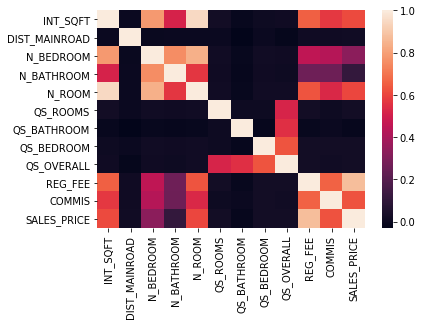

In [11]:
sns.heatmap(train.corr())

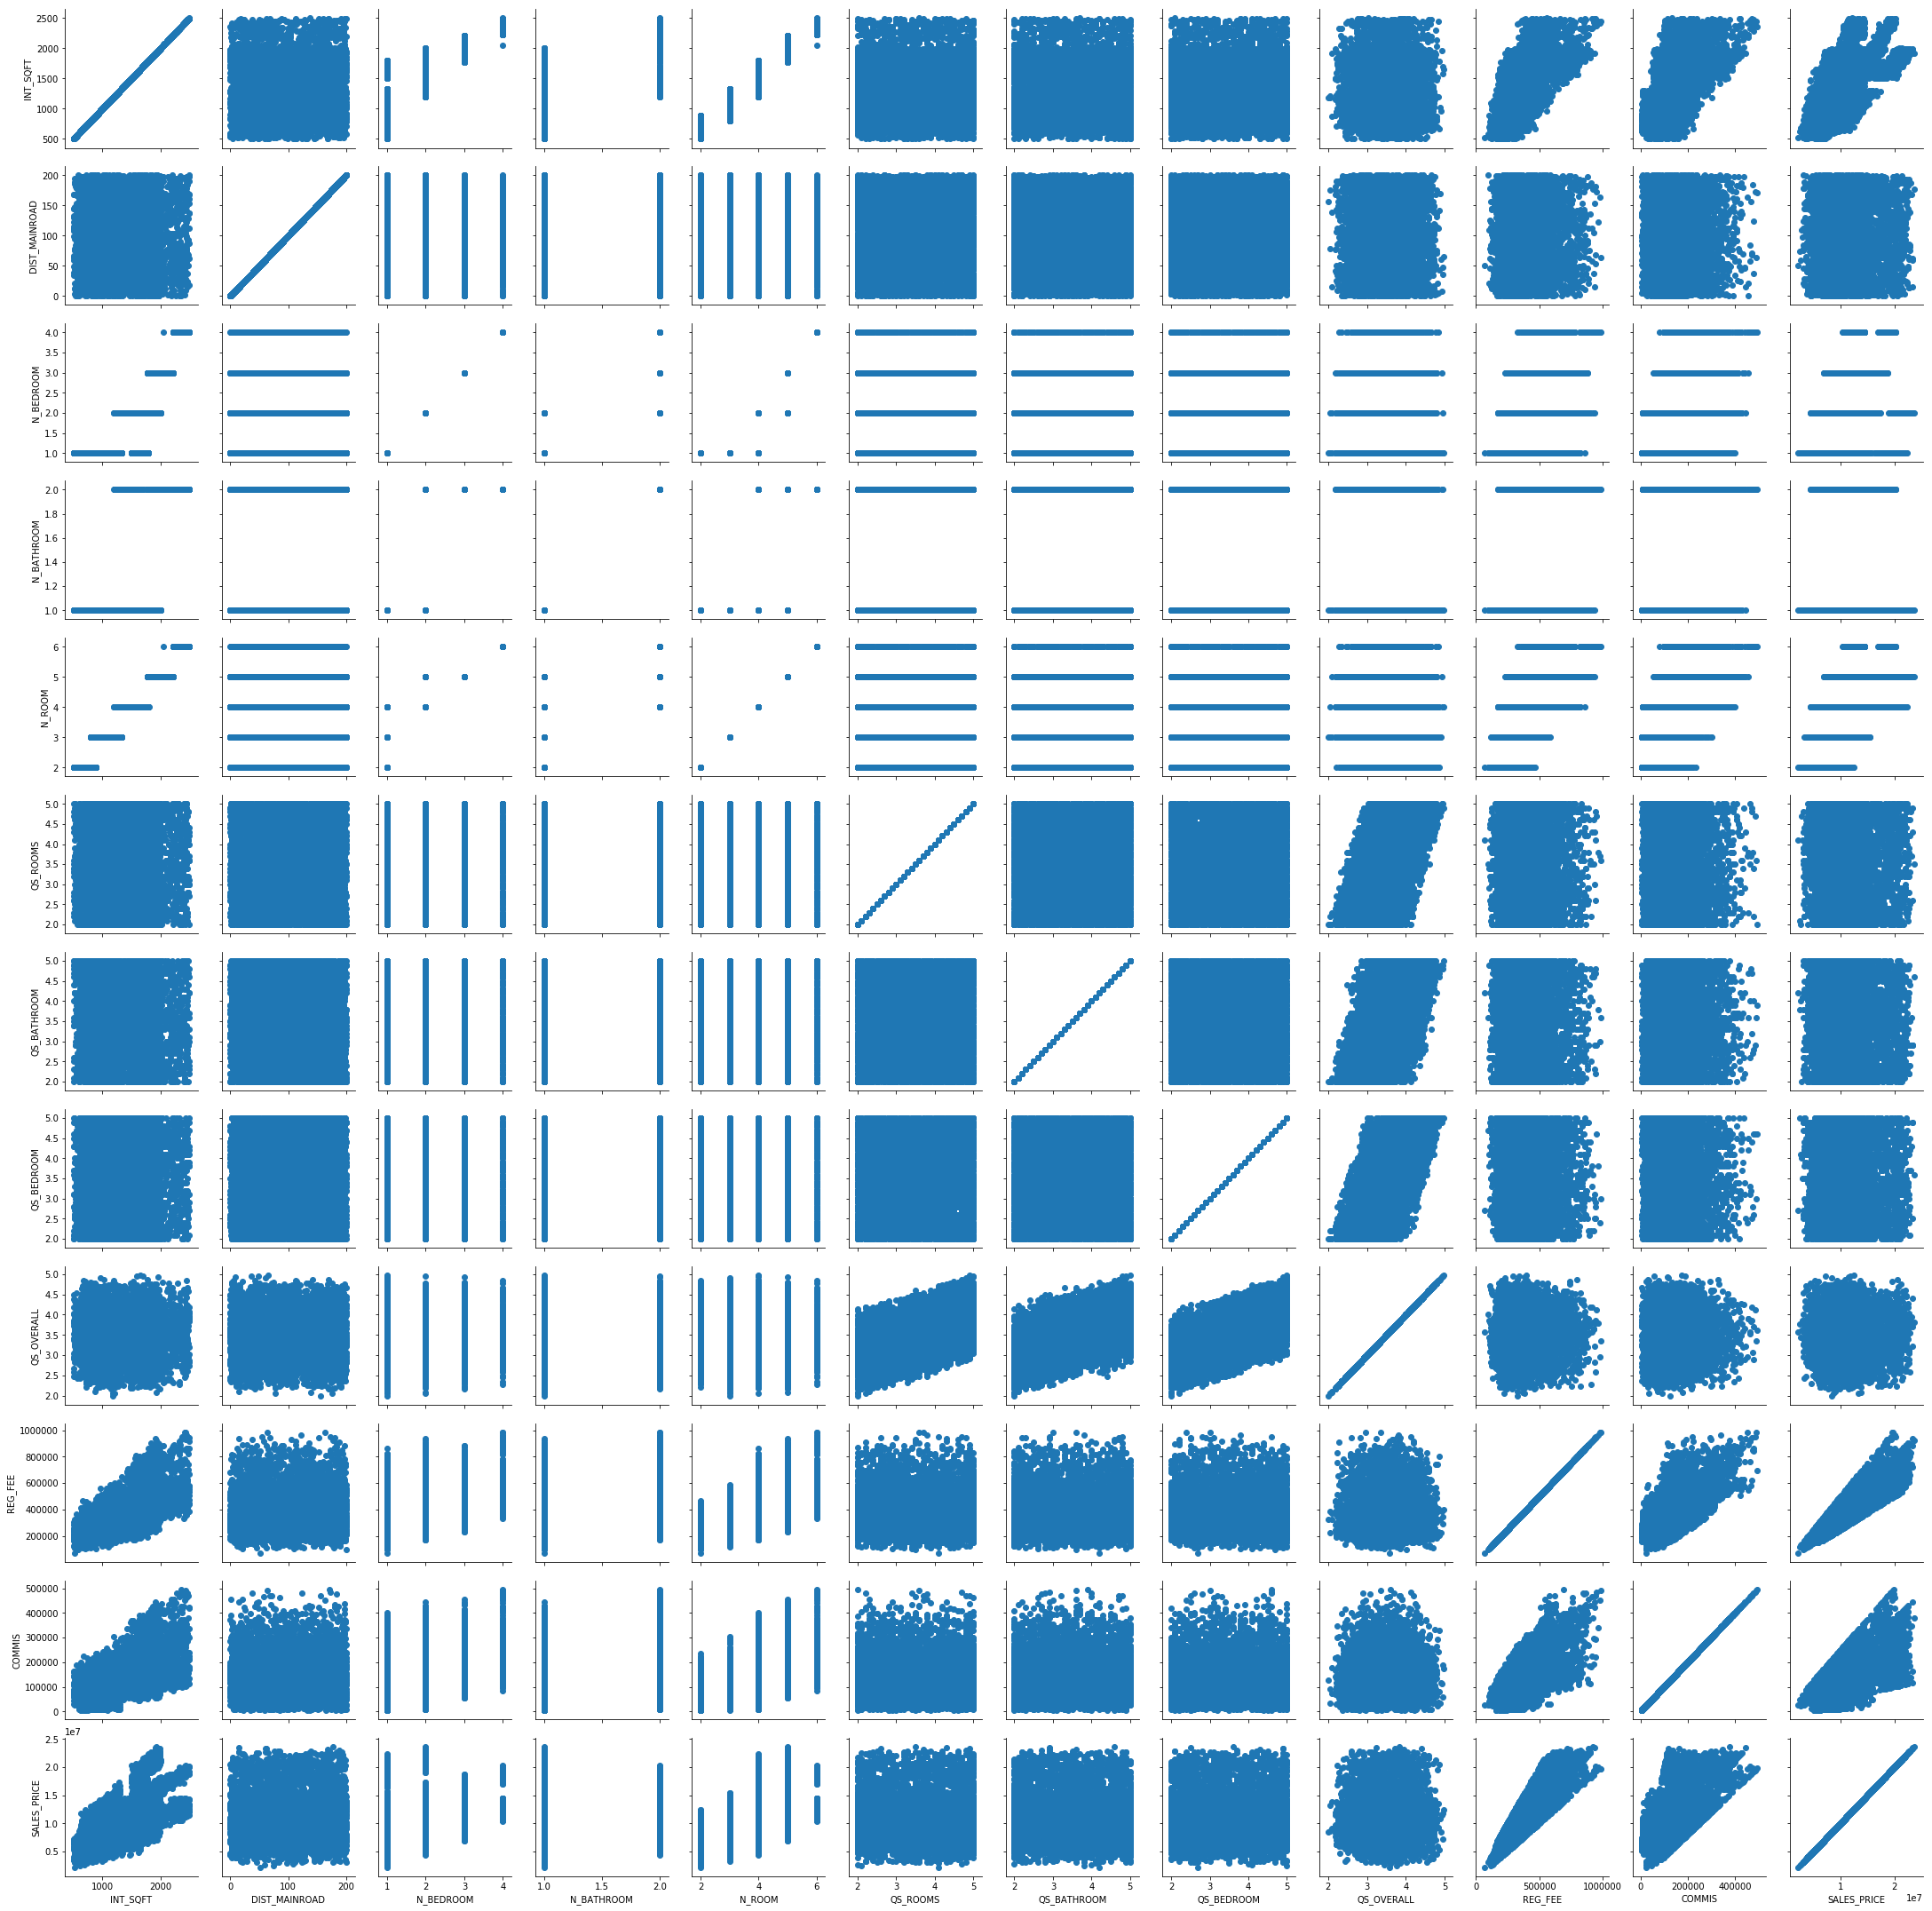

In [19]:
# Then you map to the grid
g = sns.PairGrid(train)
g.map(plt.scatter)

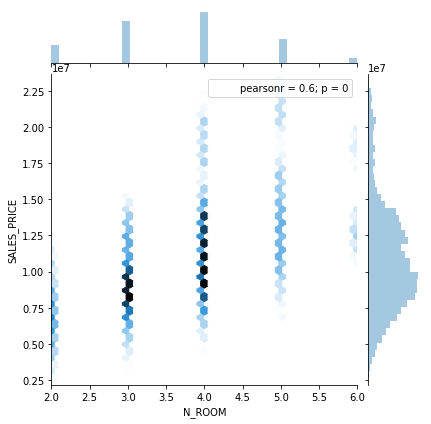

In [23]:
sns.jointplot(x='N_ROOM',y='SALES_PRICE',data=train,kind='hex')

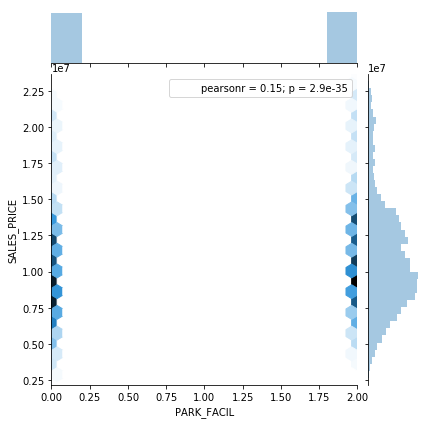

In [123]:
sns.jointplot(x='PARK_FACIL',y='SALES_PRICE',data=train,kind='hex')

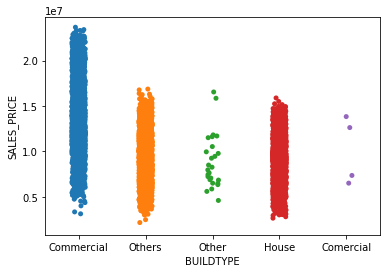

In [37]:
sns.stripplot(x="BUILDTYPE", y="SALES_PRICE", data=train,jitter=True)

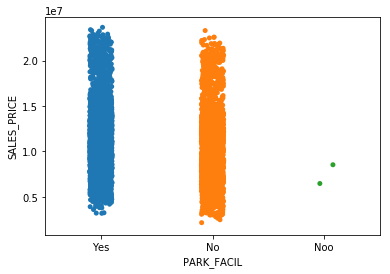

In [42]:
sns.stripplot(x="PARK_FACIL", y="SALES_PRICE", data=train,jitter=True)

In [80]:
feature_names = [x for x in train.columns if x not in ['PRT_ID','SALES_PRICE','DATE_SALE','DATE_BUILD','DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','UTILITY_AVAIL','SALE_COND','AREA']]
target = train['SALES_PRICE']

from sklearn.preprocessing import LabelEncoder
# area,sale_cond etc are character so convert it to numbers 

labelencoder = LabelEncoder()
train["BUILDTYPE"] = labelencoder.fit_transform(train["BUILDTYPE"])
test["BUILDTYPE"] = labelencoder.fit_transform(test["BUILDTYPE"])

train["PARK_FACIL"] = labelencoder.fit_transform(train["PARK_FACIL"])
test["PARK_FACIL"] = labelencoder.fit_transform(test["PARK_FACIL"])

train["STREET"] = labelencoder.fit_transform(train["STREET"])
test["STREET"] = labelencoder.fit_transform(test["STREET"])

train["MZZONE"] = labelencoder.fit_transform(train["MZZONE"])
test["MZZONE"] = labelencoder.fit_transform(test["MZZONE"])




In [81]:
from sklearn.cross_validation import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train[feature_names], target,test_size = 0.2, random_state = 0)

In [82]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()


In [83]:
regressor.fit(X_tr, y_tr)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
pred = regressor.predict(X_val)

In [85]:
from sklearn.metrics import r2_score

print(r2_score(y_val, pred))

0.856008327952396


In [86]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_val, pred)

1119514.6926636866

In [87]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, pred)

1954996575326.5815

In [116]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_tr, y_tr)
pred_rd = regressor.predict(X_val)



In [117]:
from sklearn.metrics import r2_score

print(r2_score(y_val, pred_rd))

0.9617431728538468


In [118]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, pred_rd)

519418692692.6166

In [111]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =3 )
X_poly = poly_reg.fit_transform(X_tr)
poly_reg.fit(X_poly, y_tr)

pred_poly = regressor.predict(X_val)




In [112]:

from sklearn.metrics import r2_score

print(r2_score(y_val, pred_poly))

from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, pred_poly)

0.9619349340252465


516815122444.17126